In [195]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.image import imread
from sklearn.metrics import accuracy_score, silhouette_score, precision_score, recall_score
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.datasets import load_iris, load_digits, make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

Clustering

In [3]:
iris = load_iris()

In [7]:
X = iris.data
y = iris.target

In [17]:
k = 3
kmeans = KMeans(n_clusters=k, n_init='auto')
y_pred = kmeans.fit_predict(X)

In [18]:
np.unique(y_pred)

array([0, 1, 2])

In [22]:
y_pred[y_pred == 1] = 3
y_pred[y_pred == 0] = 4
y_pred[y_pred == 2] = 5

y_pred[y_pred == 3] = 0
y_pred[y_pred == 4] = 1
y_pred[y_pred == 5] = 2

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [26]:
print(y_pred == y)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True False  True
  True  True  True  True  True False False  True  True  True  True False
  True False  True False  True  True False False  True  True  True  True
  True False  True  True  True  True False  True  True  True False  True
  True  True False  True  True False]


In [25]:
accuracy_score(y, y_pred)

0.8866666666666667

In [27]:
kmeans.cluster_centers_

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [28]:
kmeans.inertia_

78.8556658259773

In [29]:
kmeans.score(X)

-78.8556658259773

In [36]:
minibatche_kmeans = MiniBatchKMeans(n_clusters=3, n_init='auto')
y_pred = minibatche_kmeans.fit_predict(X)

In [ ]:
y_pred[y_pred == 1] = 3
y_pred[y_pred == 0] = 4
y_pred[y_pred == 2] = 5

y_pred[y_pred == 3] = 0
y_pred[y_pred == 4] = 1
y_pred[y_pred == 5] = 2

In [42]:
accuracy_score(y, y_pred)

0.8933333333333333

In [52]:
def kmeans_n_clusters(X_, k_):
    kmeans = KMeans(n_clusters=k_, n_init='auto')
    kmeans.fit(X_)
    silhou_ = silhouette_score(X_, kmeans.labels_)
    return kmeans.inertia_, silhou_

In [60]:
k_list = list(range(2,15))
inert_list, silhou_list = [],[]

for k in k_list:
    inert, silhou = kmeans_n_clusters(X, k)
    inert_list.append(inert)
    silhou_list.append(silhou)

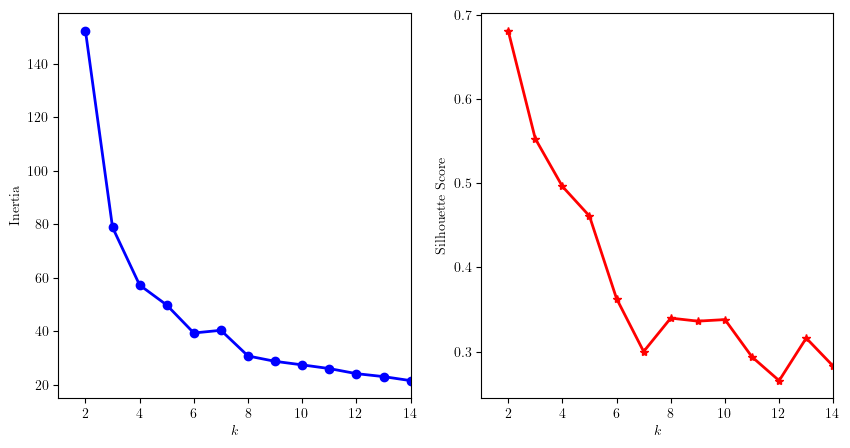

In [63]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(k_list, inert_list, 'bo-', lw=2)
plt.xlabel(r'$k$')
plt.ylabel(r'Inertia')
plt.xlim(1,14)

plt.subplot(1,2,2)
plt.plot(k_list, silhou_list, 'r*-', lw=2)
plt.xlabel(r'$k$')
plt.ylabel(r'Silhouette Score')
plt.xlim(1,14)

plt.show()

Image segmentation with clustering

In [6]:
image = imread(os.path.join('datasets','strawberry.jpg'))
image.shape

(780, 1040, 3)

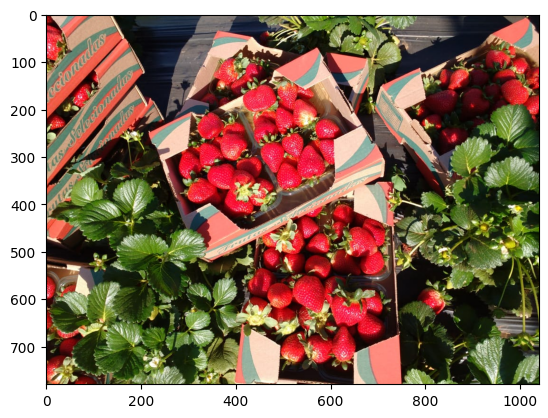

In [26]:
plt.imshow(image)
plt.show()

In [13]:
X = image.reshape(-1,3)
X.shape

(811200, 3)

In [58]:
kmeans = KMeans(n_clusters=7, n_init='auto').fit(X)

In [59]:
kmeans.cluster_centers_[kmeans.labels_].shape

(811200, 3)

In [60]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

In [61]:
segmented_img = segmented_img.reshape(image.shape).astype(int)

In [62]:
segmented_img.shape

(780, 1040, 3)

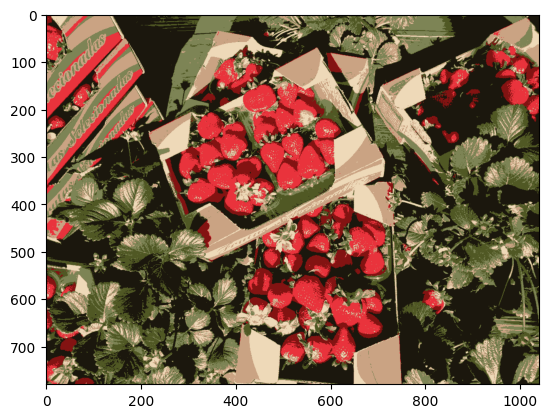

In [63]:
plt.imshow(segmented_img)
plt.show()

Semi-Supervised Learning with mnist

In [2]:
X_digits, y_digits = load_digits(return_X_y=True)

In [4]:
X_digits.shape

(1797, 64)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [10]:
log_reg = LogisticRegression(random_state=1, max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=1)

In [11]:
log_reg.score(X_test, y_test)

0.9555555555555556

In [16]:
y_pred = log_reg.predict(X_test)
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))

0.9583746478648438
0.9555555555555556


In [50]:
pipe = Pipeline([
    ('kmeans', KMeans(n_clusters=50, n_init='auto')),
    ('log_reg', LogisticRegression(max_iter=1000))
    ])

In [23]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, n_init='auto')),
                ('log_reg', LogisticRegression(max_iter=10000))])

In [25]:
pipe.score(X_test, y_test)

0.9622222222222222

In [26]:
y_pred = pipe.predict(X_test)
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))

0.9629411146006891
0.9622222222222222


In [55]:
param_grid = dict(kmeans__n_clusters=range(40,60))
grid = GridSearchCV(pipe, param_grid, cv=3)

In [ ]:
grid.fit(X_train, y_train)

In [59]:
grid.best_params_

{'kmeans__n_clusters': 42}

In [60]:
grid.score(X_test, y_test)

0.9533333333333334

In [62]:
n_labeled = 50
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [63]:
log_reg.score(X_test, y_test)

0.7733333333333333

In [62]:
k = 50
kmeans = KMeans(n_clusters=k, n_init='auto')
X_digits_dist = kmeans.fit_transform(X_train)

In [63]:
X_digits_dist.shape

(1347, 50)

In [64]:
rep_digit_idx = np.argmin(X_digits_dist, axis=0)

In [65]:
rep_digit_idx

array([1314, 1163,  413,  225, 1339, 1231,  750,  821,  884,  383, 1280,
       1132,  679,  281, 1058, 1007,  888,  451, 1333, 1294,  161,  720,
        126,  599, 1098,  496,  454,  813,   53,  855,  112,  196, 1326,
          6,  595, 1227,   29,  559,  493,  715,  696,  248,  929,  816,
       1208,  323,   87,  952,  886,  324], dtype=int64)

In [66]:
X_rep_digits = X_train[rep_digit_idx]

In [67]:
X_rep_digits.shape

(50, 64)

In [68]:
X_rep_digits_new = X_rep_digits.reshape(50,8,8)

In [69]:
X_rep_digits_new.shape

(50, 8, 8)

In [70]:
X_rep_digits_new.shape

(50, 8, 8)

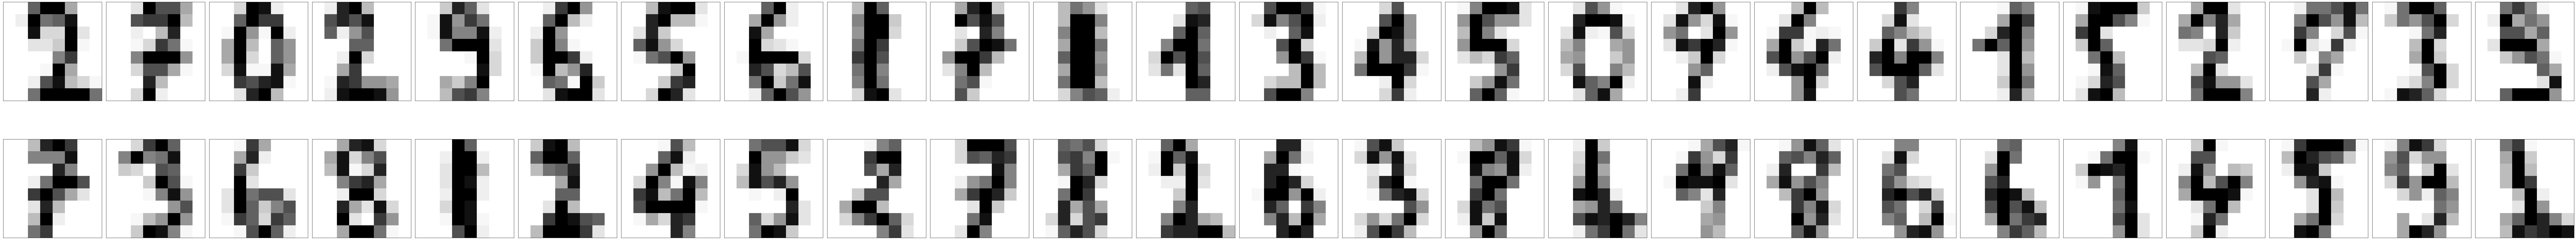

In [71]:
a,b = 2, 25

fig, axs = plt.subplots(a,b, subplot_kw={'xticks': [], 'yticks': []}, figsize=(120,15))

k = 0

for i in range(a):
    for j in range(b):
        img = X_rep_digits_new[k]
        axs[i][j].imshow(img, cmap='Greys')
        k += 1

plt.tight_layout()
plt.show()

In [81]:
rf_clf = RandomForestClassifier(n_estimators=250)

In [84]:
rf_clf.fit(X_digits, y_digits)
y_pred_rf = rf_clf.predict(X_rep_digits)
y_pred_rf

array([2, 7, 0, 2, 9, 6, 5, 6, 1, 7, 1, 1, 3, 4, 5, 0, 9, 4, 4, 1, 5, 2,
       7, 3, 9, 7, 3, 6, 8, 1, 2, 4, 5, 2, 7, 8, 2, 6, 3, 8, 1, 9, 8, 6,
       6, 1, 4, 5, 9, 1])

In [85]:
y_rep = np.array([2, 7, 0, 2, 9, 6, 5, 6, 1, 7, 1, 1, 3, 4, 5, 0, 9, 4, 4, 1, 5, 2, 7, 3, 9, 7, 3, 6, 8, 1, 2, 4, 5, 2, 7, 8, 2, 6, 3, 8, 1, 9, 8, 6, 6, 1, 4, 5, 9, 1])

In [86]:
y_rep.shape

(50,)

In [87]:
log_reg = LogisticRegression(max_iter=10000)

In [88]:
log_reg.fit(X_rep_digits, y_rep)

LogisticRegression(max_iter=10000)

In [89]:
log_reg.score(X_test, y_test)

0.92

In [90]:
kmeans.labels_

array([15, 44, 23, ..., 23, 34, 29])

In [91]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)

In [93]:
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_rep[i]

In [95]:
y_train_propagated.shape

(1347,)

In [96]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=10000)

In [97]:
log_reg.score(X_test, y_test)

0.94

In [98]:
percentile_closest = 20

In [107]:
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
X_cluster_dist.shape

(1347,)

In [126]:
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partitally_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partitally_propagated]
y_train_partially_propagated = y_train[partitally_propagated]

In [129]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9266666666666666

In [128]:
np.mean(y_train_partially_propagated == y_train[partitally_propagated])

1.0

DBSCAN

In [131]:
X, y = make_moons(n_samples=1000, noise=0.05)

In [133]:
dbscan = DBSCAN(eps=0.05, min_samples=5)

In [134]:
dbscan.fit(X)

DBSCAN(eps=0.05)

In [139]:
print(dbscan.labels_.shape)
dbscan.labels_[:15]

(1000,)


array([ 0,  1,  2, -1,  1,  2,  3,  4,  0,  2,  0,  0,  0,  5,  2],
      dtype=int64)

In [140]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [142]:
dbscan.core_sample_indices_.shape

(796,)

In [143]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [144]:
np.unique(dbscan.labels_)

array([0, 1], dtype=int64)

In [145]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=50)
kn_clf.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

Gaussian Mixture Models

In [149]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [150]:
gm.weights_

array([0.21124075, 0.20515395, 0.5836053 ])

In [151]:
gm.means_

array([[ 1.72907611, -0.07046047],
       [-0.74276137,  0.55737566],
       [ 0.49214433,  0.25914416]])

In [152]:
gm.covariances_

array([[[ 0.06228124,  0.06713613],
        [ 0.06713613,  0.09022423]],

       [[ 0.05475218,  0.06326649],
        [ 0.06326649,  0.08983369]],

       [[ 0.16409948, -0.09509672],
        [-0.09509672,  0.2846047 ]]])

In [153]:
gm.converged_

True

In [154]:
gm.n_iter_

15

In [157]:
gm.predict(X)[:10]

array([2, 0, 2, 2, 0, 1, 2, 2, 2, 1], dtype=int64)

In [158]:
gm.predict_proba(X)

array([[5.32832331e-021, 3.34483674e-072, 1.00000000e+000],
       [9.85816152e-001, 1.20348773e-186, 1.41838476e-002],
       [6.61721579e-127, 4.44693950e-002, 9.55530605e-001],
       ...,
       [1.76427909e-167, 9.96515399e-001, 3.48460107e-003],
       [2.53949769e-137, 7.14468526e-001, 2.85531474e-001],
       [1.28413397e-015, 1.34741098e-084, 1.00000000e+000]])

In [160]:
X_new, y_new = gm.sample(10)

In [164]:
X_new

array([[-0.79855703,  0.52713419],
       [-0.69330502,  0.57196923],
       [-0.49969215,  0.9967945 ],
       [-0.70967028,  0.45515906],
       [-0.60337139,  0.64162671],
       [-0.23536107,  0.71969174],
       [ 0.38056361,  0.09960145],
       [ 0.38441169, -0.26964363],
       [ 0.74424853, -0.29619187],
       [-0.03984992,  0.4547921 ]])

In [162]:
y_new

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [168]:
sc = gm.score_samples(X)
sc.shape

(1000,)

In [171]:
sc[sc >= 0]

array([0.00126353, 0.0331315 , 0.00736465, 0.01590624, 0.05351161,
       0.05977977, 0.0062125 , 0.05449579, 0.01611496])

Anomaly detection

In [172]:
densities = gm.score_samples(X)

In [175]:
density_threshold = np.percentile(densities, 4)
density_threshold

-2.192516463481565

In [183]:
anomalies = X[densities < density_threshold]
anomalies.shape

(40, 2)

Number of clusters

In [184]:
gm.aic(X)

2717.329264489185

In [186]:
gm.bic(X)

2800.7611042318813

In [189]:
k_list = list(range(2,30))
aic_list, bic_list = [],[]

for k in k_list:
    gm = GaussianMixture(n_components=k, n_init=10)
    gm.fit(X)
    aic_list.append(gm.aic(X))
    bic_list.append(gm.bic(X))

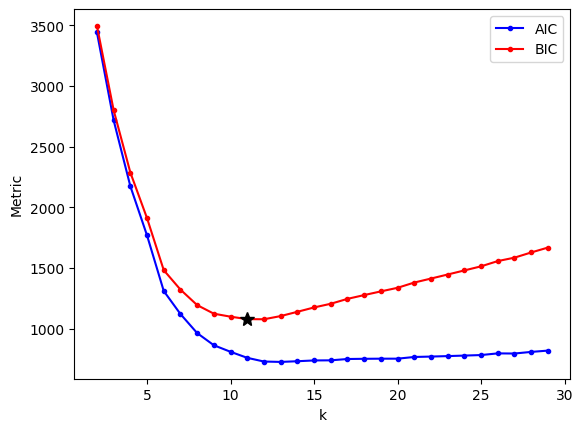

In [193]:
plt.plot(k_list, aic_list, 'b.-', label='AIC')
plt.plot(k_list, bic_list, 'r.-', label='BIC')
plt.plot(11, min(bic_list), 'k*', markersize=10)
plt.xlabel('k')
plt.ylabel('Metric')
plt.legend()
plt.show()

In [212]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=44)

In [213]:
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=44)

In [214]:
np.round(bgm.weights_, 2)

array([0.13, 0.14, 0.14, 0.  , 0.14, 0.12, 0.16, 0.11, 0.06, 0.  ])